In [1]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P6_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25c49a28990>,
 'caps': [<matplotlib.lines.Line2D at 0x25c49a2a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c49a1bd50>],
 'medians': [<matplotlib.lines.Line2D at 0x25c49a2bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c49a34890>],
 'means': []}

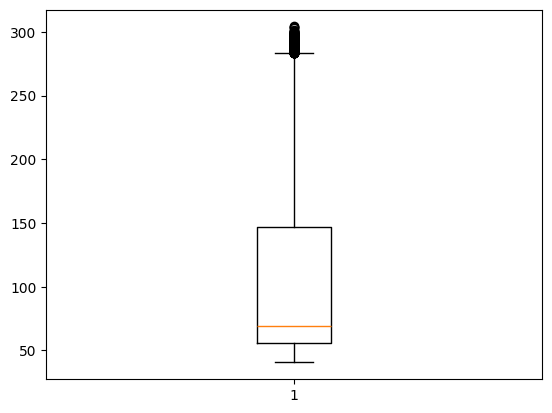

In [3]:
plt.boxplot(p4["RHeel_pos_Z"])

In [4]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  247 :  45.453
R -  362 :  47.547
R -  474 :  43.371
R -  584 :  43.452
R -  692 :  48.574
R -  800 :  53.226
R -  906 :  54.557
R -  1015 :  52.042
R -  1125 :  51.085
R -  1235 :  47.269
R -  1343 :  45.704
R -  1450 :  46.16
R -  1557 :  43.052
R -  1667 :  45.736
R -  1773 :  49.74
R -  1882 :  54.052
R -  1990 :  53.354
R -  2099 :  54.65
R -  2205 :  50.362
R -  2317 :  46.632
R -  2423 :  47.407
R -  2530 :  45.372
R -  2645 :  40.551
R -  2764 :  46.246
R -  2884 :  52.486
R -  3004 :  54.367
R -  3123 :  51.903
R -  3250 :  52.062
R -  3380 :  48.295
R -  3506 :  43.737
R -  3633 :  46.55
R -  3763 :  43.44
R -  3885 :  42.377
R -  4006 :  46.553
R -  4137 :  50.264
R -  4261 :  53.819
R -  4389 :  48.823
R -  4524 :  50.897
R -  4655 :  47.064
R -  4781 :  43.524
R -  4899 :  46.249
R -  5021 :  43.113
R -  5136 :  42.702
R -  5259 :  47.199
R -  5394 :  52.408
R -  5514 :  57.603
R -  5612 :  55.873
R -  5709 :  55.311
R -  5800 :  52.775
R -  5894 :  50.074
R -  5981 : 

In [5]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  177 :  48.81
L -  302 :  43.609
L -  415 :  44.588
L -  526 :  40.111
L -  636 :  46.819
L -  744 :  52.637
L -  849 :  53.843
L -  959 :  53.56
L -  1067 :  52.652
L -  1178 :  49.373
L -  1286 :  45.993
L -  1394 :  47.027
L -  1502 :  44.648
L -  1609 :  43.48
L -  1717 :  50.193
L -  1824 :  53.439
L -  1932 :  54.013
L -  2043 :  53.891
L -  2150 :  51.855
L -  2258 :  49.368
L -  2366 :  43.234
L -  2475 :  46.585
L -  2582 :  42.188
L -  2698 :  44.029
L -  2821 :  51.796
L -  2940 :  51.802
L -  3059 :  51.615
L -  3180 :  51.797
L -  3309 :  52.467
L -  3438 :  48.129
L -  3565 :  40.981
L -  3693 :  44.097
L -  3821 :  40.238
L -  3942 :  44.401
L -  4068 :  50.907
L -  4192 :  51.31
L -  4321 :  54.502
L -  4450 :  50.018
L -  4586 :  52.06
L -  4717 :  46.74
L -  4837 :  43.436
L -  4958 :  43.646
L -  5078 :  41.013
L -  5194 :  46.186
L -  5325 :  53.035
L -  5455 :  54.85
L -  5563 :  55.006
L -  5660 :  54.166
L -  5754 :  54.211
L -  5850 :  50.768
L -  5937 :  48

In [6]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [7]:
steps = pd.DataFrame(steps)
steps

,0,1
0,177,48.810
1,247,45.453
2,302,43.609
3,362,47.547
4,415,44.588
...,...,...
161,9323,44.458
162,9381,41.132
163,9453,45.898
164,9515,45.894


In [27]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [28]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [29]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [30]:
start_music[start_music[0]=='P6_M2'][1].item()

5120.0

In [31]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P6_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P6_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P6_M3'][1].item()

In [32]:
m2

,0,1
1,5305.179138,80.7495BPM
2,5379.482993,80.7495BPM
3,5453.786848,80.7495BPM
4,5528.090703,80.7495BPM
5,5604.716553,78.3026BPM
6,5680.181406,79.5072BPM
7,5755.646258,79.5072BPM
8,5831.111111,79.5072BPM
9,5904.253968,82.0313BPM
10,5978.557823,80.7495BPM


(0.0, 9800.0)

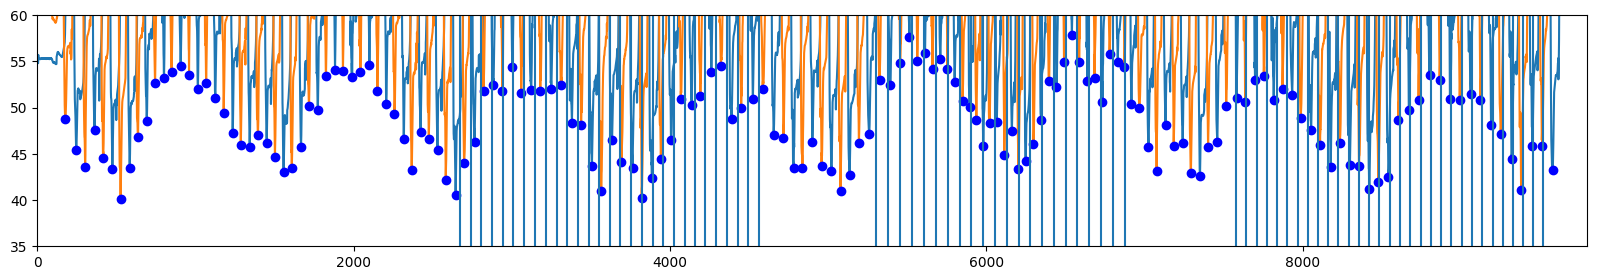

In [49]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([35, 60])
plt.xlim([0, 9800])

In [34]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

95.17437844913604

In [35]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

96.0

# P6 - M1

In [36]:
m1_start = m1[0].min()
m1_end = m1[0].max()
print(m1_start)
print(m1_end)

2670.3492063
4561.6145125


In [37]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [72]:
steps_in_m1_range.count()

30

In [95]:
steps_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100/60)

95.17437844913604

In [79]:
beats_in_m1_range.max()-beats_in_m1_range.min()

1891.2653062000004

In [88]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100/60)

92.00189916749818

In [96]:
#all WALKING M1
steps_in_m1_range.count()/((steps_in_m1_range.max()-steps_in_m1_range.min())/100)*60

98.5761226725082

In [97]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [91]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [92]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

98.68421052631581

In [43]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

92.7683246045788

In [44]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

55.004456948275845

In [45]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 30]

(2650.3492063, 4581.6145125)

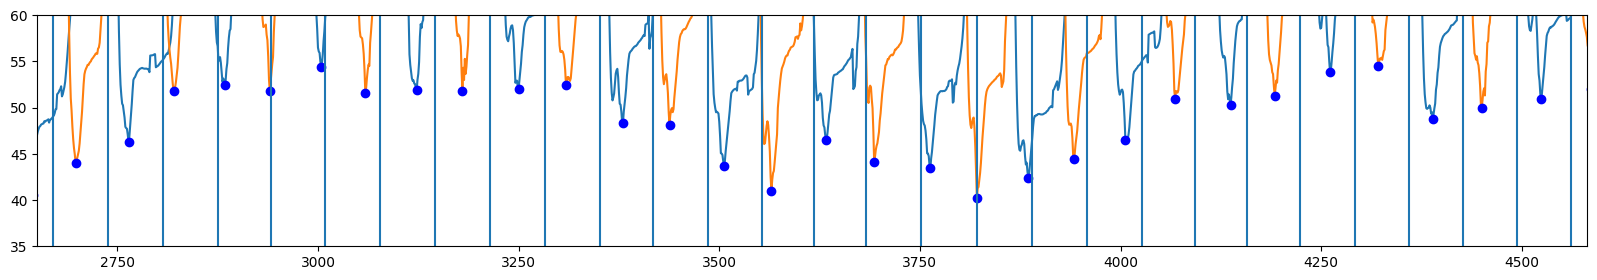

In [50]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([35, 60])
plt.xlim([m1_start-20, m1_end+20])

# P6 - M2

In [51]:
m2_start = m2[0].min()
m2_end = m2[0].max()
print(m2_start)
print(m2_end)

5305.1791383
6878.3310658


In [52]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [53]:
#all MUSIC M1
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [54]:
#all WALKING M1
steps_in_m2_range.count()/((steps_in_m2_range.max()-steps_in_m2_range.min())/100/60)

127.90697674418604

In [99]:
first3W = steps_in_m2_range[steps_in_m2_range <= steps_in_m2_range.min()+300]

In [101]:
first3W.count()/((first3W.max()-first3W.min())/100/60)

125.43554006968641

In [100]:
first3M = beats_in_m2_range[beats_in_m2_range <= beats_in_m2_range.min()+300]

In [102]:
first3M.count()/((first3M.max()-first3M.min())/100/60)

100.15443312816204

In [55]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [56]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [57]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

133.55317394888704

In [58]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5285.1791383, 6898.3310658)

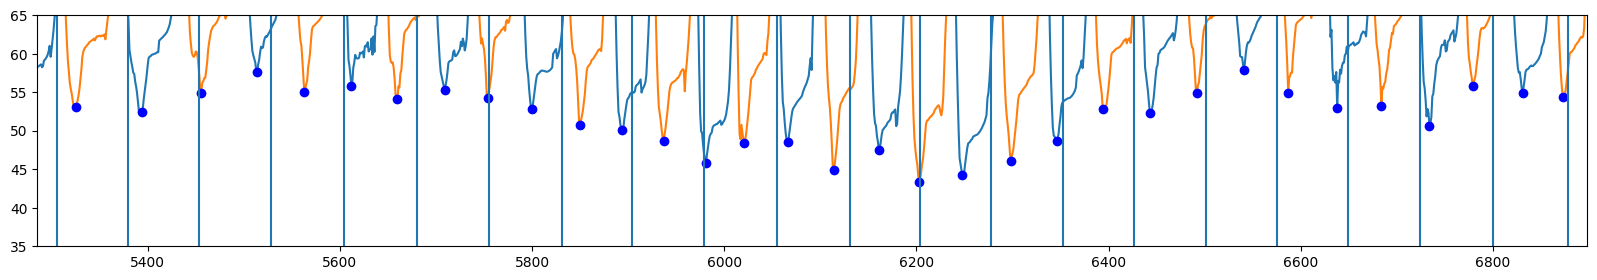

In [98]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([35, 65])
plt.xlim([m2_start-20, m2_end+20])

# P6 - M3

In [60]:
m3_start = m3[0].min()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7578.4761905
9521.9863946


In [61]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [62]:
#all MUSIC M1
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [63]:
#all WALKING M1
steps_in_m3_range.count()/((steps_in_m3_range.max()-steps_in_m3_range.min())/100/60)

99.32747025349198

In [64]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [65]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [66]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

98.67172675521822

In [67]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7558.4761905, 9541.9863946)

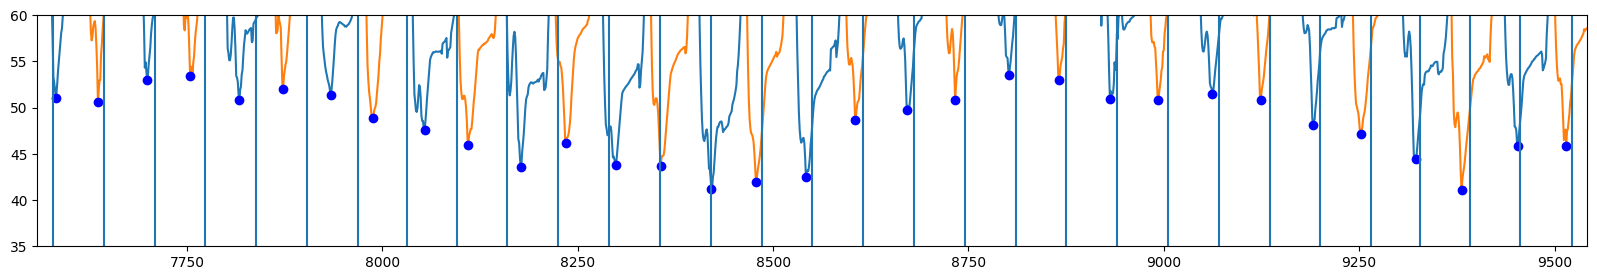

In [68]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([35, 60])
plt.xlim([m3_start-20, m3_end+20])